In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import json
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

In [ ]:
nltk.download('stopwords')

# YELP - Tips.json

In [ ]:
df_tips = pd.read_json('/content/drive/MyDrive/Datasets_PF/Yelp/tip.json', lines=True)
df_tips.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
df_tips.shape

(908915, 5)

In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [ ]:
df_tips.iloc[0]

,0
user_id,AGNUgVwnZUey3gcPCJ76iw
business_id,3uLgwr0qeCNMjKenHJwPGQ
text,Avengers time with the ladies.
date,2012-05-18 02:17:21
compliment_count,0


In [ ]:
df_tips.isnull().sum()

,0
user_id,0
business_id,0
text,0
date,0
compliment_count,0


In [ ]:
df_tips.duplicated().sum()

67

In [ ]:
df_tips.drop_duplicates(inplace=True)

In [ ]:
#Importar la libreria
from textblob import TextBlob

#Funcion para calcular la polaridad de los comentarios
def calcular_polaridad(text):
    return TextBlob(str(text)).sentiment.polarity

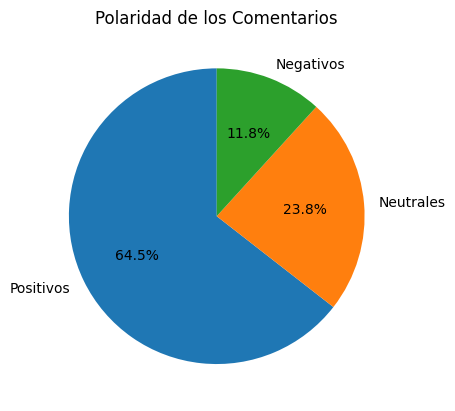

In [ ]:
#Calcular la polaridad de los comentarios en la columna text
df_tips['polaridad'] = df_tips['text'].apply(calcular_polaridad)

#Calcular porcentajes
positivo = df_tips[df_tips['polaridad'] > 0]['polaridad'].count() / len(df_tips) * 100
negativo = df_tips[df_tips['polaridad'] < 0]['polaridad'].count() / len(df_tips) * 100
neutral = df_tips[df_tips['polaridad'] == 0]['polaridad'].count() / len(df_tips) * 100

# Datos para el gráfico
etiquetas = ['Positivos', 'Neutrales', 'Negativos']
tamaños = [positivo, neutral, negativo]

# Crear el gráfico de torta
plt.pie(tamaños, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Polaridad de los Comentarios')
plt.show()

In [ ]:
import string

def analizar_sentimiento(comentarios, polaridad):
    """
    Analiza los comentarios y devuelve las palabras más frecuentes para una polaridad dada.

    Args:
        comentarios: Una lista de comentarios.
        polaridad: 'positivo' o 'negativo'.

    Returns:
        Un diccionario con las palabras y sus frecuencias.
    """

    stop_words = set(stopwords.words('english'))
    all_words = []
    for comentario in comentarios:
        # Tokenizar y convertir a minúsculas
        words = nltk.word_tokenize(comentario.lower())
        # Eliminar signos de puntuación y palabras que no sean alfanuméricas
        words = [word for word in words if word.isalpha()]
        # Eliminar stop words
        words = [word for word in words if word not in stop_words]
        all_words.extend(words)

    word_counts = Counter(all_words)
    return word_counts.most_common(10)  # Devuelve las 10 palabras más frecuentes


In [ ]:
#Analizar comentarios
comentarios_positivo = analizar_sentimiento(df_tips[df_tips['polaridad'] > 0]['text'], 'positivo')
comentarios_negativo = analizar_sentimiento(df_tips[df_tips['polaridad'] < 0]['text'], 'negativo')

#Crear datos para el grafico
palabras_positivas = [palabra for palabra, _ in comentarios_positivo]
frecuencia_positivas = [frecuencia for _, frecuencia in comentarios_positivo]

palabras_negativas = [palabra for palabra, _ in comentarios_negativo]
frecuencia_negativas = [frecuencia for _, frecuencia in comentarios_negativo]

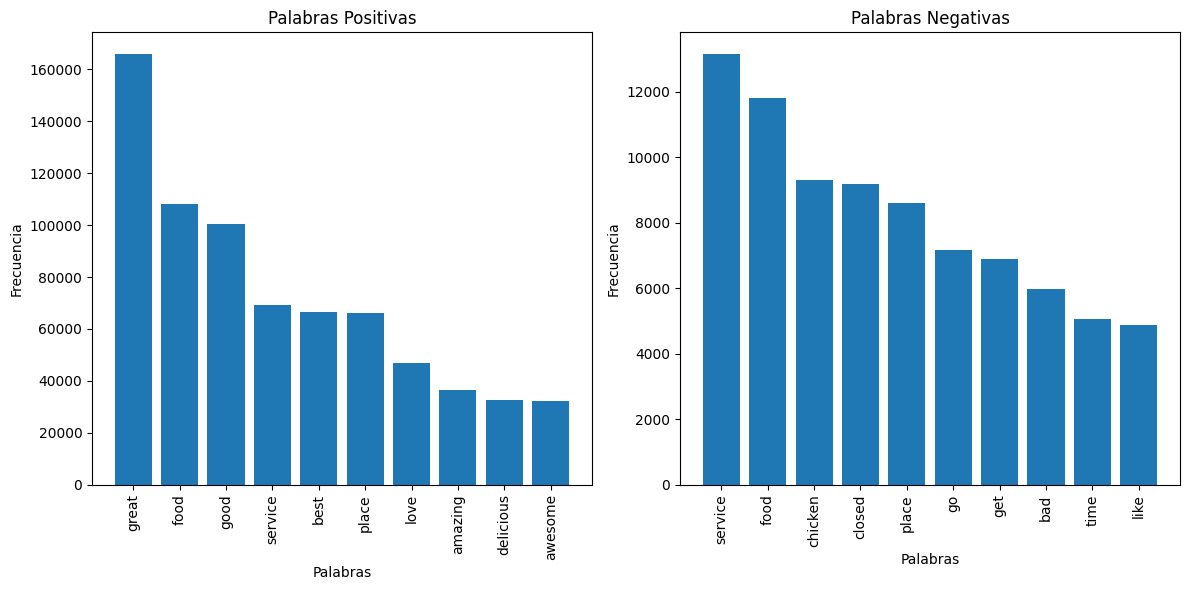

In [ ]:
# Crear figura con dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de palabras positivas
axes[0].bar(palabras_positivas, frecuencia_positivas)
axes[0].set_title('Palabras Positivas')
axes[0].set_xlabel('Palabras')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Gráfico de palabras negativas
axes[1].bar(palabras_negativas, frecuencia_negativas)
axes[1].set_title('Palabras Negativas')
axes[1].set_xlabel('Palabras')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocesar_texto(texto):
    palabras = texto.lower().split()
    # Eliminar signos de puntuación y palabras que no sean alfanuméricas
    palabras_filtradas = [word for word in palabras if word.isalpha()]
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras_filtradas

In [ ]:
# Crear la matriz de co-ocurrencia para los tips con polaridad positiva
tokens_positivos = df_tips[df_tips['polaridad'] > 0]['text'].apply(preprocesar_texto)
coocurrencia_matriz_tips = co_occurrencia_matriz(tokens_positivos, 2)  # Ajusta el tamaño de la ventana si es necesario

# Convertir la matriz de Counter a un DataFrame para facilitar el análisis
df_cooccurrences_tips = pd.DataFrame.from_dict(coocurrencia_matriz_tips, orient='index', columns=['count'])

# Visualización o análisis posterior (ej: filtrar por las co-ocurrencias más frecuentes)
top_coocurrencias_tips = df_cooccurrences_tips.sort_values('count', ascending=False).head(20)
top_coocurrencias_tips

,count
"(great, food)",11090
"(great, place)",8580
"(great, service)",7033
"(good, food)",6333
"(happy, hour)",6302
"(food, great)",5070
"(great, food,)",4240
"(make, sure)",4091
"(i've, ever)",3904
"(great, service.)",3760


In [ ]:
# Crear la matriz de co-ocurrencia para los tips con polaridad positiva
tokens_negativos = df_tips[df_tips['polaridad'] < 0]['text'].apply(preprocesar_texto)
coocurrencia_matriz_tipsN = co_occurrencia_matriz(tokens_negativos, 2)  # Ajusta el tamaño de la ventana si es necesario

# Convertir la matriz de Counter a un DataFrame para facilitar el análisis
df_cooccurrences_tipsN = pd.DataFrame.from_dict(coocurrencia_matriz_tipsN, orient='index', columns=['count'])

# Visualización o análisis posterior (ej: filtrar por las co-ocurrencias más frecuentes)
top_coocurrencias_tipsN = df_cooccurrences_tipsN.sort_values('count', ascending=False).head(20)
top_coocurrencias_tipsN

,count
"(customer, service)",1274
"(go, wrong)",816
"(can't, go)",815
"(customer, service.)",656
"(i've, ever)",613
"(worst, service)",519
"(fried, chicken)",514
"(never, go)",492
"(late, night)",485
"(waste, time)",452
